<a href="https://colab.research.google.com/github/VHKA1729/Machine-Learning/blob/master/Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: p. 248-251 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
np.random.seed(seed=1729)

### IMPORTING DATA (DAY-WISE AND HOURLY)

In [0]:
#reading day-wise data

df_day = pd.read_csv('Bike-Sharing-Dataset/day.csv')
day_y = df_day[["cnt"]]

#reading hourly data
df_hour = pd.read_csv('Bike-Sharing-Dataset/hour.csv')
hour_y = df_hour[["cnt"]]

### EXPLORATORY DATA ANALYSIS

In [0]:
#Shape of daily dataset
print("The shape of daily dataset is:", df_day.shape)

#Data-types of columns of daily data
print("The datatypes of columns in daily dataset are:\n", df_day.dtypes)

The shape of daily dataset is: (731, 16)
The datatypes of columns in daily dataset are:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [0]:
#Shape of hourly dataset
print("The shape of hourly dataset is:", df_hour.shape)

#Data-types of columns of hourly data
print("The datatypes of columns in hourly dataset are:\n", df_hour.dtypes)

The shape of hourly dataset is: (17379, 17)
The datatypes of columns in hourly dataset are:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [0]:
#CHECKING PRESENCE OF NULL VALUES IN day-wise DATA
print("Daily data features and number of null values in them:\n",df_day.isna().sum())

Daily data features and number of null values in them:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [0]:
#CHECKING PRESENCE OF NULL VALUES IN HOURLY DATA
print("Hourly data features and number of null values in them:\n",df_hour.isna().sum())

Hourly data features and number of null values in them:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


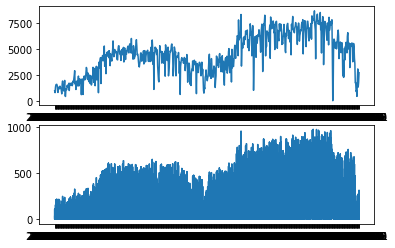

In [0]:
#print("plot of 'dteday' with 'cnt' for daily data [left] and hourly data[right] :")
plt.subplot(2,1,1)
plt.plot(df_day['dteday'], day_y)
plt.subplot(2,1,2)
plt.plot(df_hour['dteday'], hour_y)

In [0]:
# Dropping DTEDAY since the information conveyed by it is being captured under the season, yr, mnth and other columns
#Further, the above plots show that there is no clear trend 
# Dropping INSTANT since it is merely an index of the records and hence doesn't give any information about CNT
day_x = df_day.drop(["dteday","instant"], axis=1)
hour_x = df_hour.drop(["dteday","instant"], axis=1)

In [0]:
corrMatrix_day = day_x.corr()
corrMatrix_hour = hour_x.corr()

Heatmap for correlation in daily data


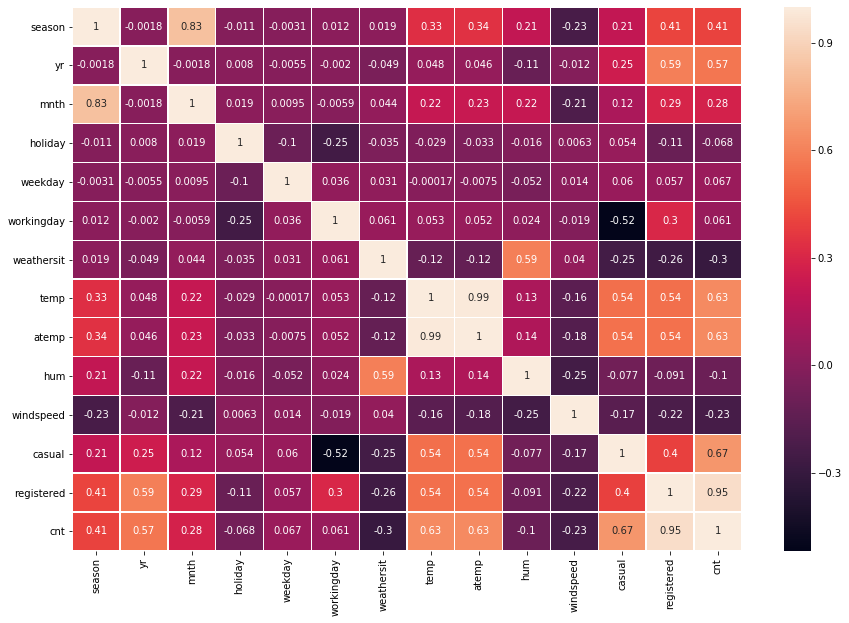

In [0]:
print("Heatmap for correlation in daily data")
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corrMatrix_day,annot=True,linewidths=0.3)

Heatmap for correlation in hourly data


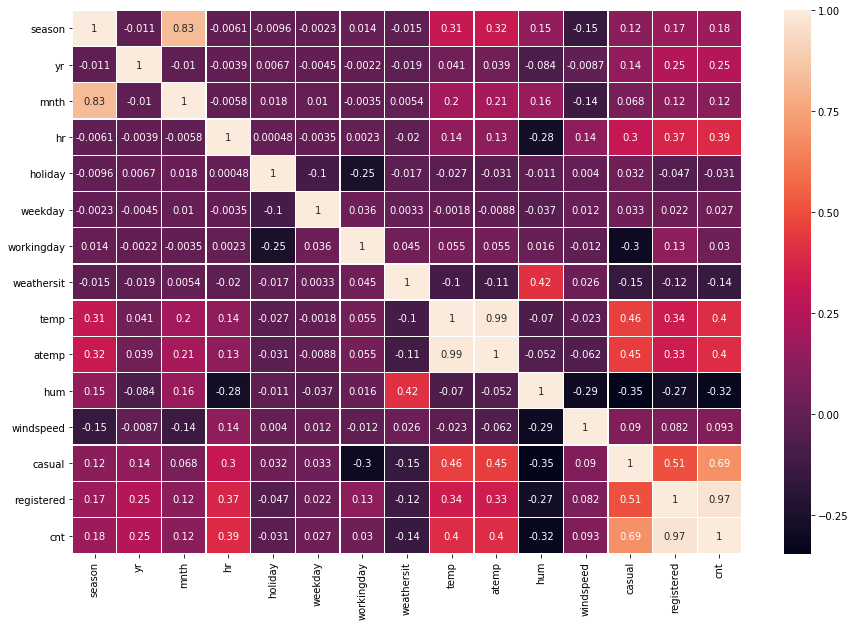

In [0]:
print("Heatmap for correlation in hourly data")
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corrMatrix_hour,annot=True,linewidths=0.3)

In [0]:
# Dropping the features CASUAL and REGISTERED since cnt = casual + registered.
# Since casual and registered are themselves dependent variables, they cannot be used in regression of the dependent variable "cnt".
# Casual and registered are the actual values being captured in the field and the CNT column has been created by their summation.
# Hence, if we know the data of "CASUAL" and "REGISTERED", it makes no sense to use regression for predicting, since we can directly obtain "CNT" via their summation

day_x = day_x.drop(["cnt","casual","registered"], axis=1)
hour_x = hour_x.drop(["cnt","casual","registered"], axis=1)

In [0]:
print(day_x.head())

   season  yr  mnth  holiday  ...      temp     atemp       hum  windspeed
0       1   0     1        0  ...  0.344167  0.363625  0.805833   0.160446
1       1   0     1        0  ...  0.363478  0.353739  0.696087   0.248539
2       1   0     1        0  ...  0.196364  0.189405  0.437273   0.248309
3       1   0     1        0  ...  0.200000  0.212122  0.590435   0.160296
4       1   0     1        0  ...  0.226957  0.229270  0.436957   0.186900

[5 rows x 11 columns]


In [0]:
print(day_y.head())

    cnt
0   985
1   801
2  1349
3  1562
4  1600


In [0]:
print(hour_x.head())

   season  yr  mnth  hr  holiday  ...  weathersit  temp   atemp   hum  windspeed
0       1   0     1   0        0  ...           1  0.24  0.2879  0.81        0.0
1       1   0     1   1        0  ...           1  0.22  0.2727  0.80        0.0
2       1   0     1   2        0  ...           1  0.22  0.2727  0.80        0.0
3       1   0     1   3        0  ...           1  0.24  0.2879  0.75        0.0
4       1   0     1   4        0  ...           1  0.24  0.2879  0.75        0.0

[5 rows x 12 columns]


In [0]:
print(hour_y.head())

   cnt
0   16
1   40
2   32
3   13
4    1


Pairplots for features in cleaned daily data 


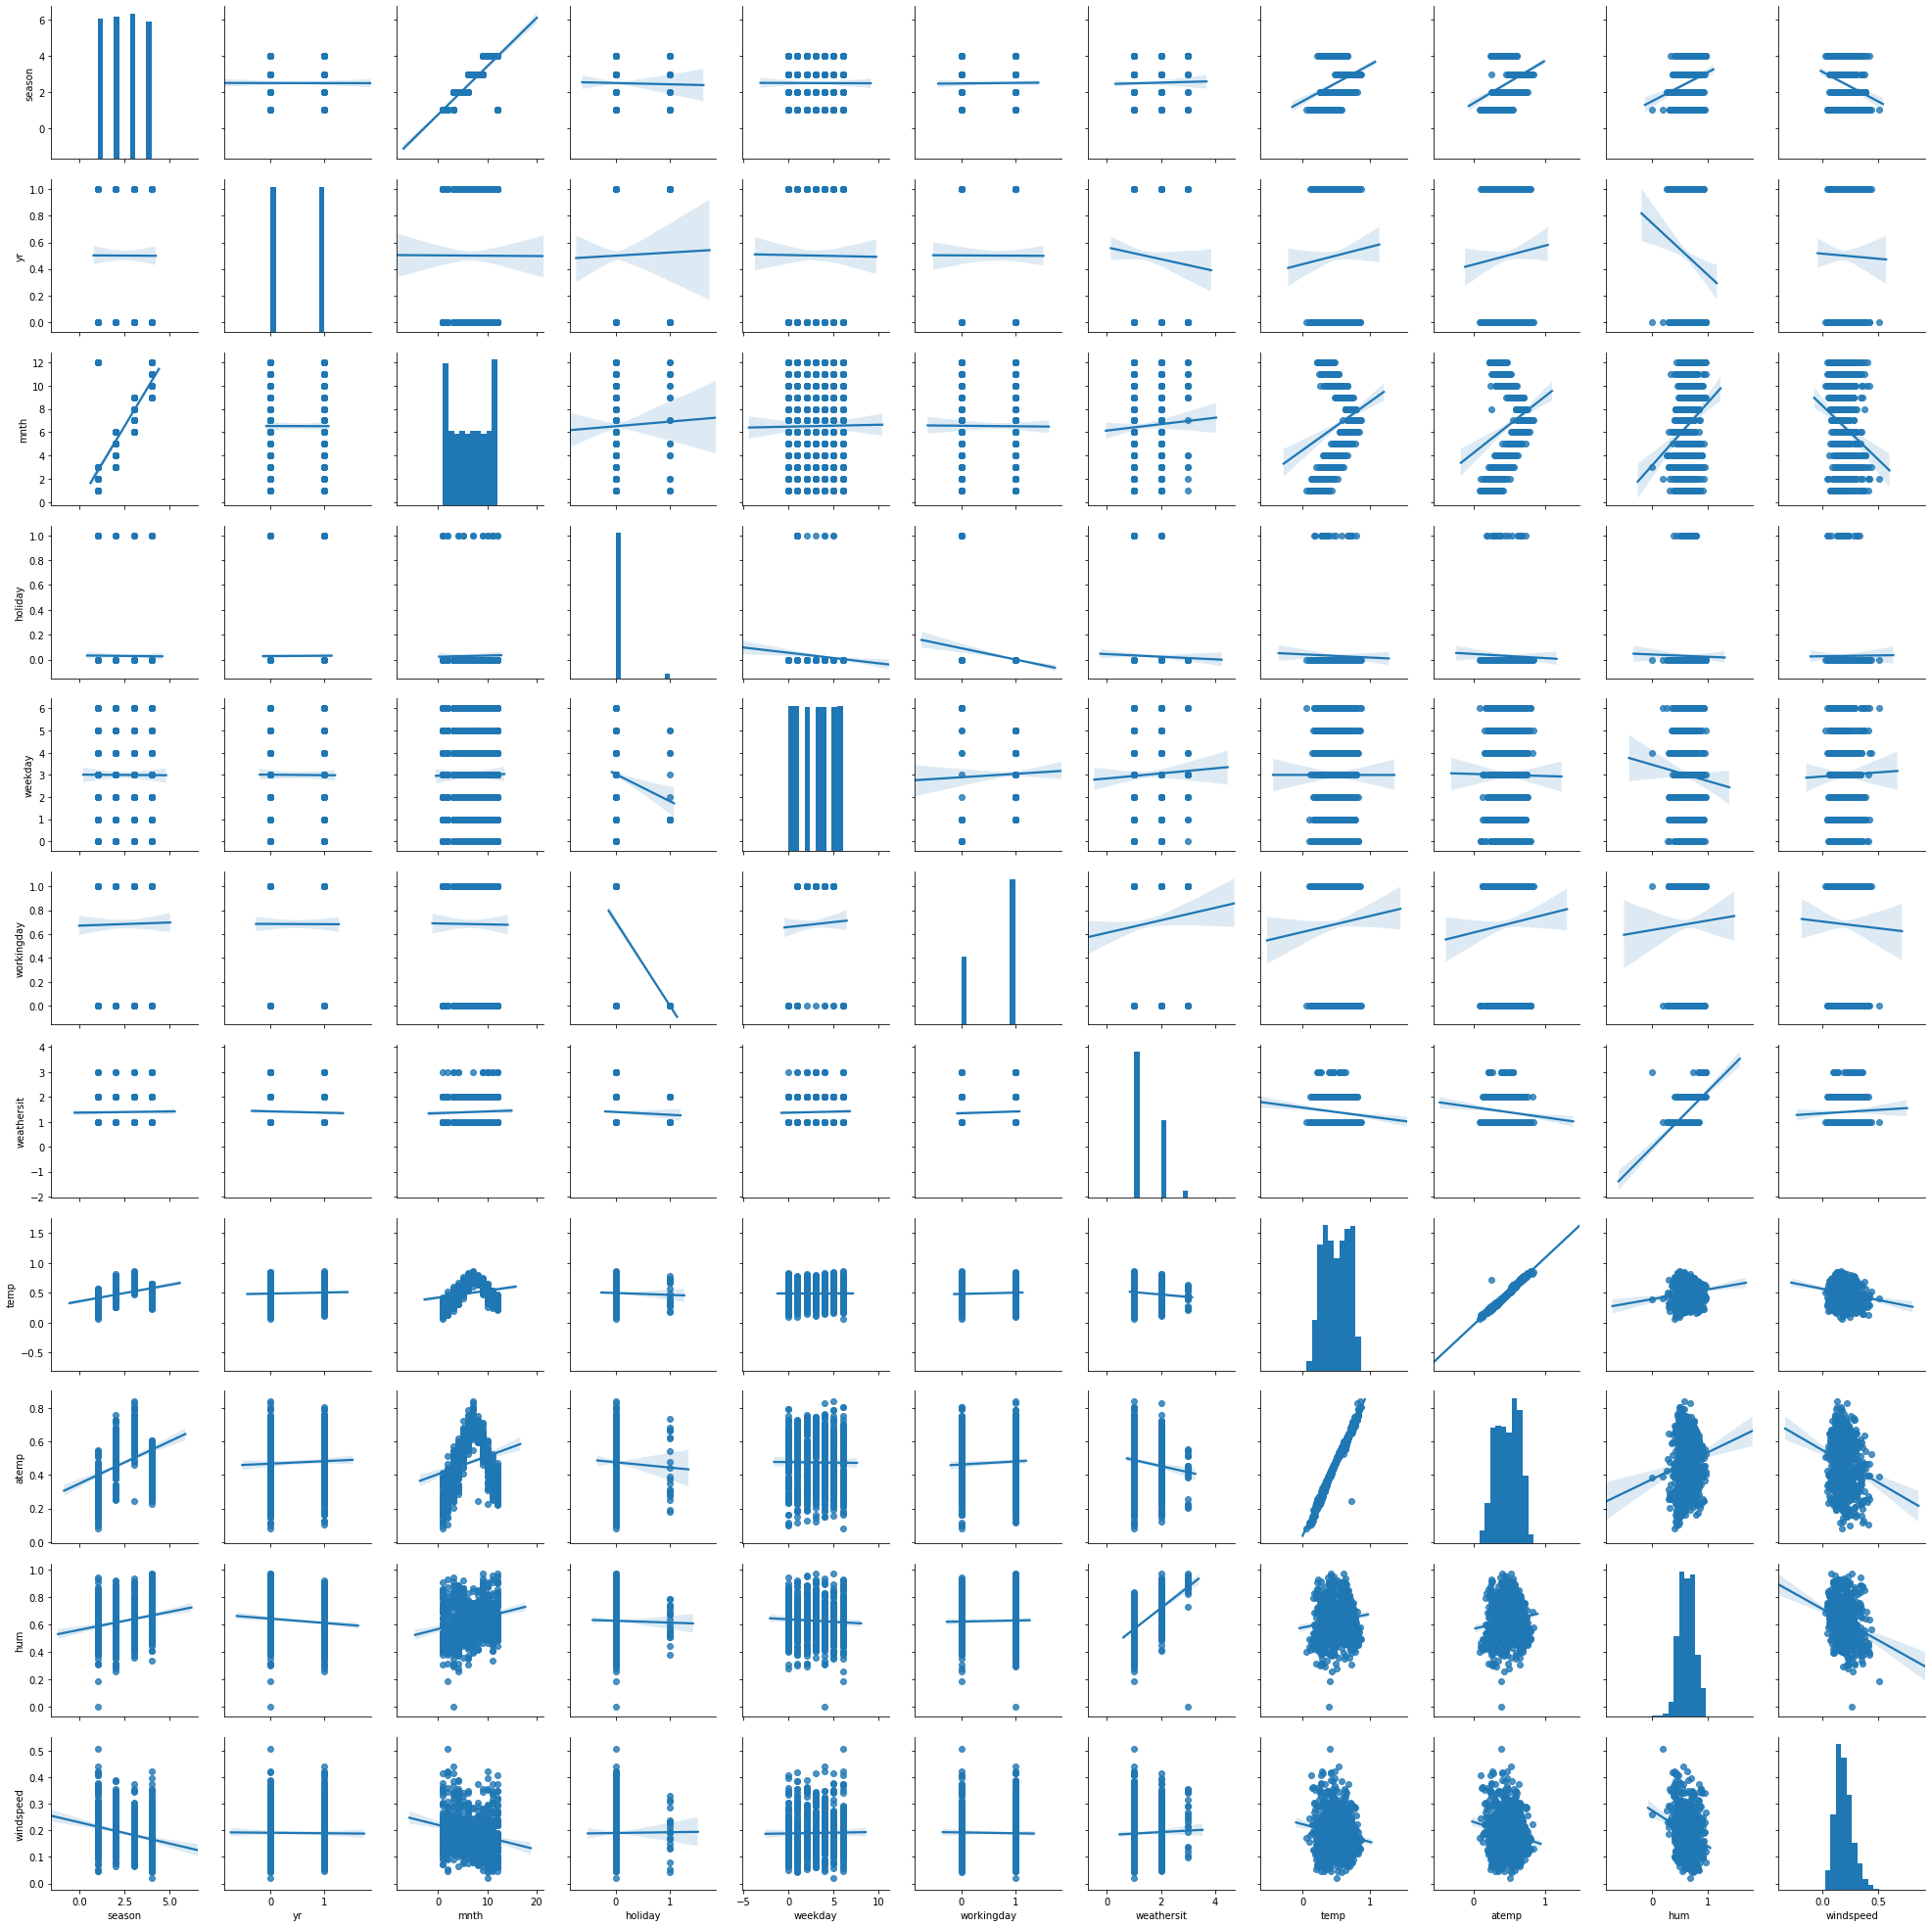

In [0]:
print("Pairplots for features in cleaned daily data ")
sns.pairplot(data = day_x, kind= 'reg')

Pairplots for features in cleaned hourly data 


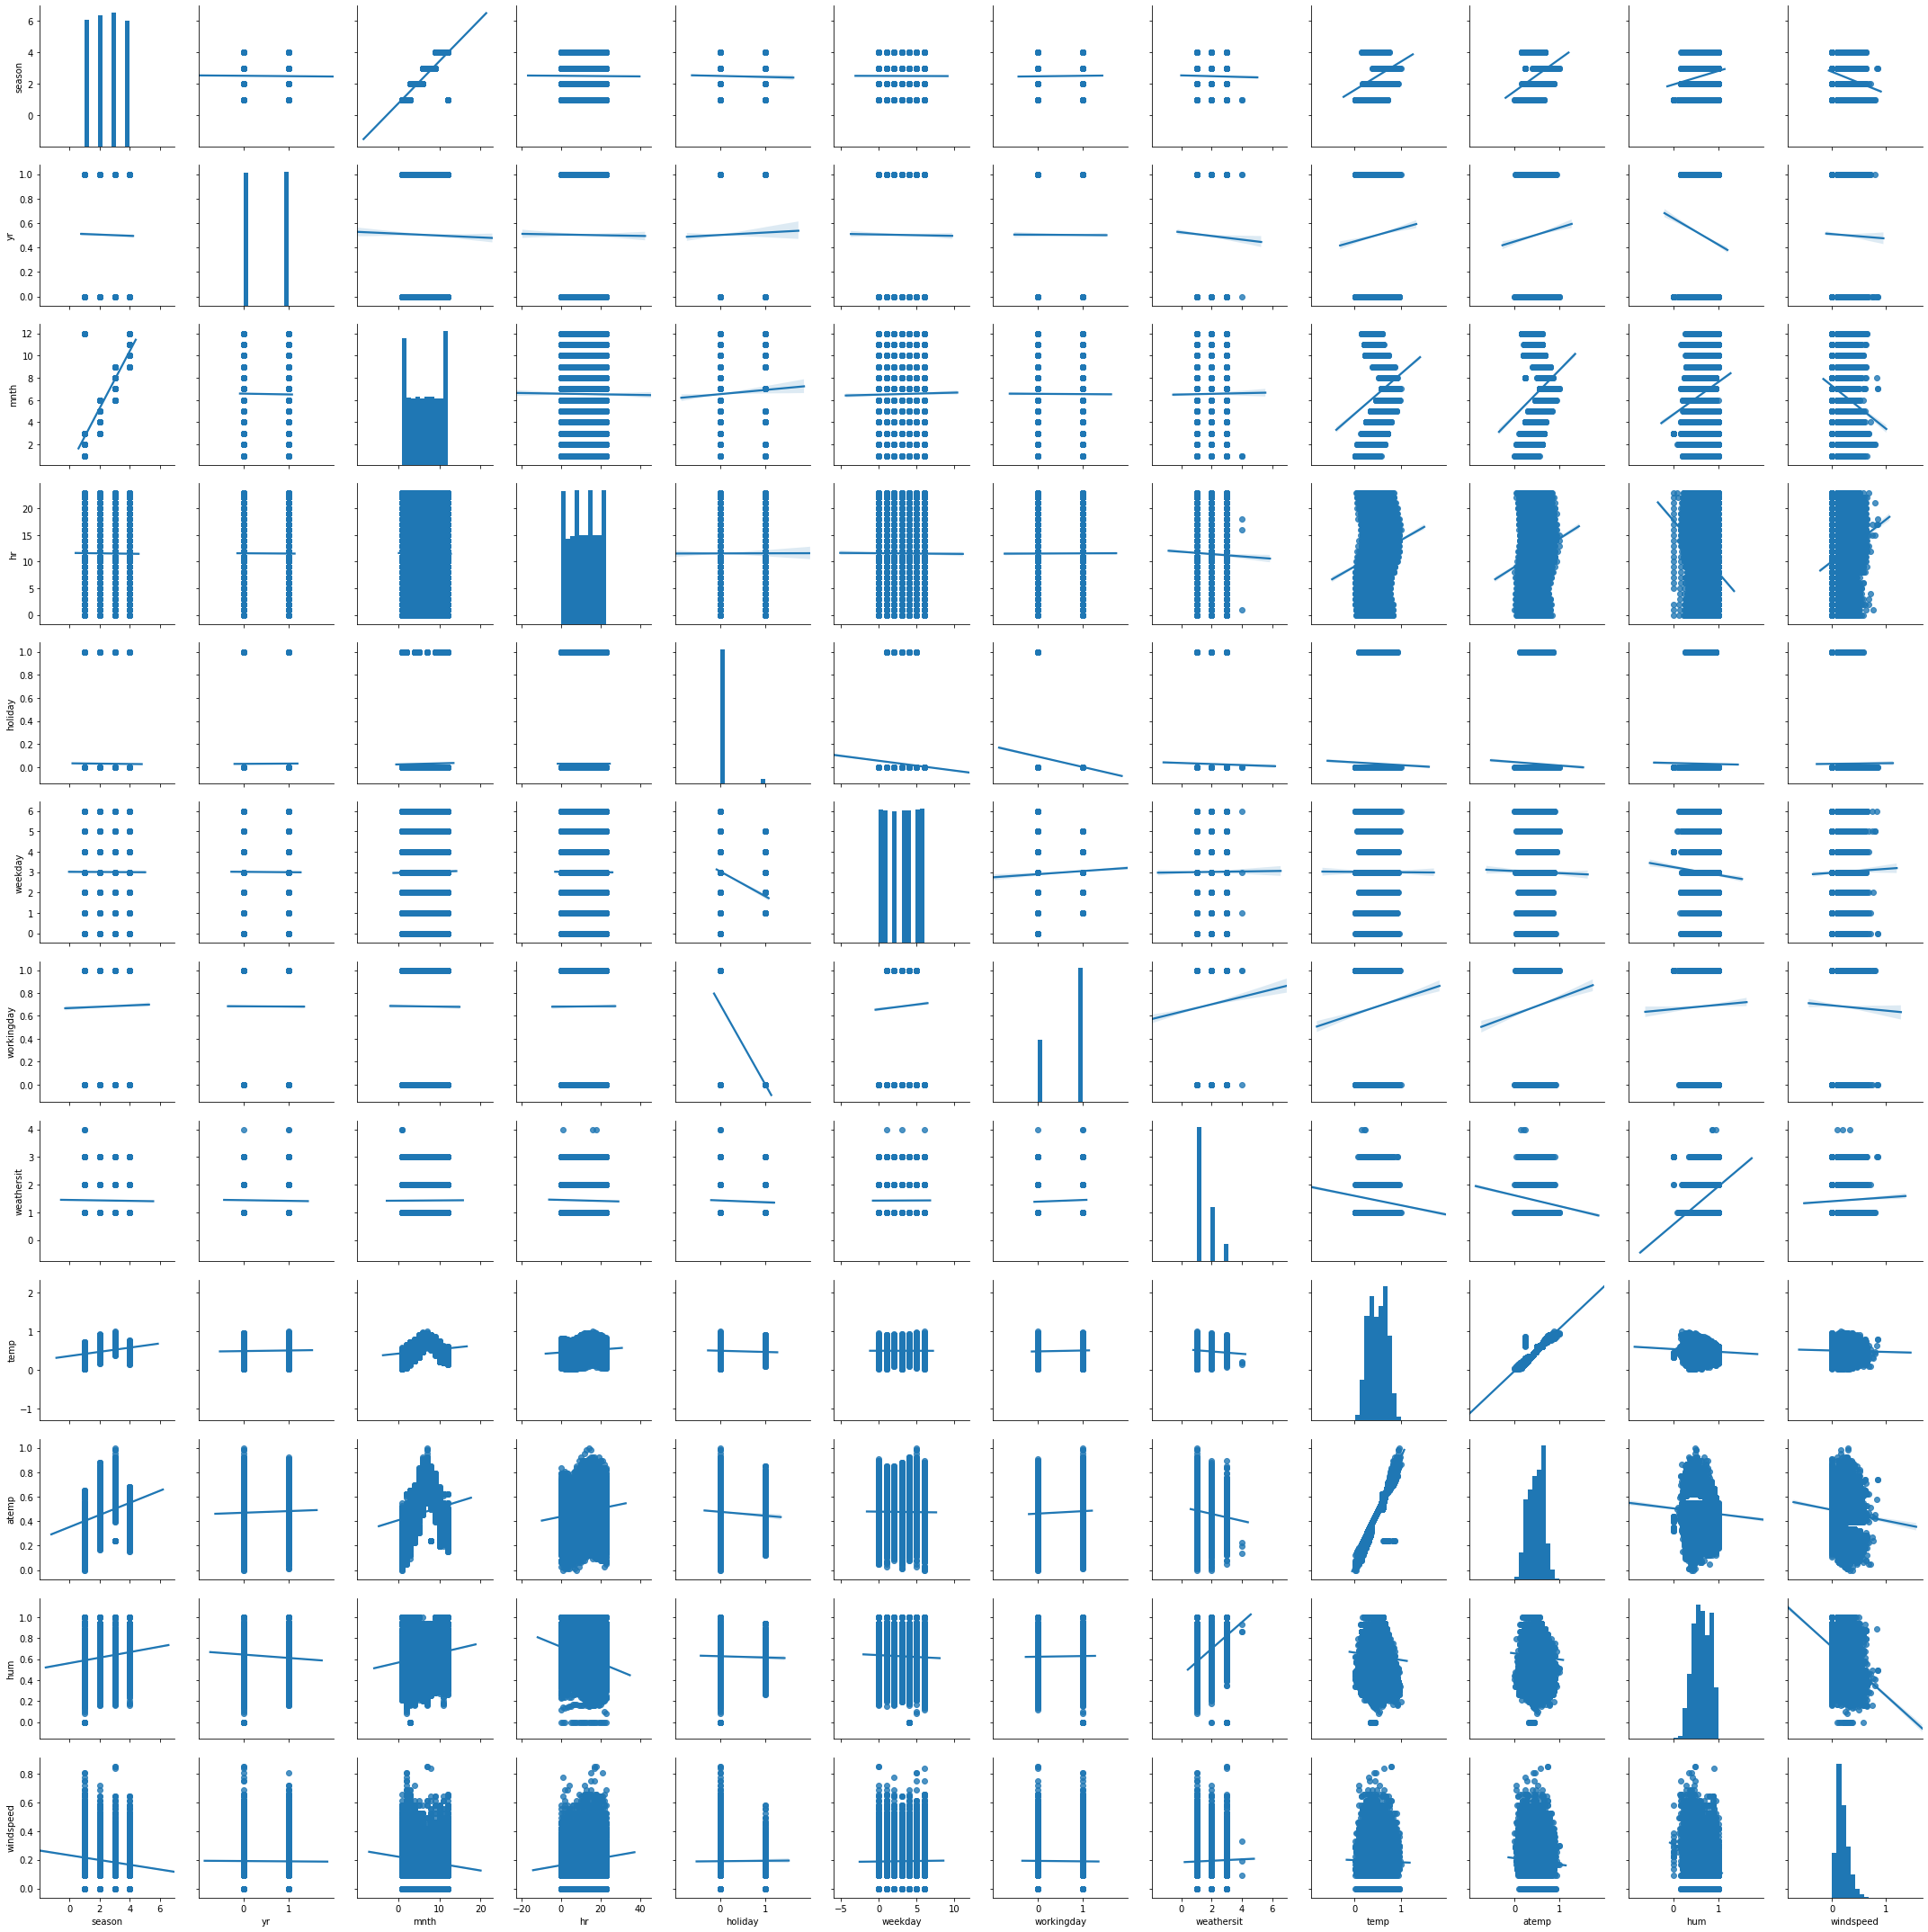

In [0]:
## This step of code execution takes time
print("Pairplots for features in cleaned hourly data ")
sns.pairplot(data = hour_x, kind ='reg')
#sns.pairplot(data = hour_x, kind ='reg', hue = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit'])

# IMPLEMENTING FORWARD SELECTION

We are using $wrapper$ $methods$ for feature selection. Hence, t-score is not useful. T-score based tests belong to the class of methods known as $filter$ $methods$.
Although **t-test** can theoretically be used with k-fold cross-validation, yet its utility is **doubtful**. In a k-fold cross-validation, we have independent test sets. However, the independence assumption is violated for the training sets. Consider the case of 10-fold cross validation. Here, the training sets will share 80% data. 

Dietterich states that *the experiments also suggest caution in interpreting the results of the 10-fold cross-validated t-test. This test has an elevated probability of type-I error (as much as twice the target level)*

$Reference$: 
1. **T. G. Dietterich**. Approximate statistical test for comparing supervised classification learning algorithms. Neural Computation, 10(7):1895–1924, 1998

2. **C. Nadeau and Y. Bengio**. Inference for the generalization error. Machine Learning, 2001.

"In order for the validation set approach to yield accurate estimates of the test
error, we must use *only the training observations* to perform all aspects of
model-fitting — including variable selection. Therefore, the determination of
which model of a given size is best must be made using *only the training
observations*. This point is subtle but important. If the full data set is used
to perform the best subset selection step, the validation set errors and
cross-validation errors that we obtain will not be accurate estimates of the
test error."
ISLR

In [0]:
def regress(features, X_train, y_train, X_test, y_test):
    '''
    This function performs regression for a given feature set of size 'r' using training values
    It then calculates the RSS (Residual Sum of Squares) for the obtained model and returns the model as well as the RSS
    '''
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(features)])
    regression = model.fit()
    RSS = ((regression.predict(X_test[list(features)]) - y_test) ** 2).sum()
    return {"model":regression, "RSS":RSS}
    #returning a dictionary with two key-value pairs
    #the key "model" has the statsmodels object as value
    #the key "RSS" has the Residual Sum of Squares as value

In [0]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    results = []
    remaining_predictors = [] # remaining_predictors consists of predictors that have not been used for model building
    for p in X_train.columns:
      if p not in predictors:
        remaining_predictors.append(p)
    
    # the predictors which have not been used for model building are added to the existing model, one at a time
    # the new model is then subjected to regression
    # the "results" list is a list of dictionaries, with each dictionary having the r-sized model and corresponding "RSS"
    for p in remaining_predictors:
        results.append(regress(predictors+[p], X_train, y_train, X_test, y_test))
    
    # converting the list of dictionaries to a dataframe
    models = pd.DataFrame(results)
    
    # out of the given set of r-sized models, we choose the model with the lowest RSS
    # this is equivalent to choosing the model with the highest R-square
    # models['RSS'].idxmin() returns the row index of the row having the lowest RSS value
    # models.loc[models['RSS'].idxmin()] chooses the row having the lowest RSS value
    # this corresponds to choosing a PandasSeries which has the "model" and the corresponding "RSS" value as elements
    best_model = models.loc[models['RSS'].idxmin()]
        
    # Return the best model
    return best_model

# MODEL SELECTION USING CROSS-VALIDATION

We will now choose among the various models of different sizes using cross-validation.
 
To implement this, we adopt a combination of subsetting and itertive approach. 
The outer loop iterates over each fold while the inner loop iterates over each of the best model. 

In the $j^{th}$ iteration of the outer loop, the
elements of the fold $j$ will be in the test set, while the remainder will be in
the training set. Now, using the inner loop, we make our predictions for each model size, compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix `cv.errors`. 

The $(i,j)^{th}$ element of `cv.errors` corresponds to the test MSE for the $i^{th}$ cross-validation fold for the best $j$-variable
model. 

In [0]:
def cv(y,X,k):
  # function to perform cross-validation
  #k is the number of folds
  folds = np.random.choice(k, size = len(y), replace = True)

  # creating a DataFrame for storing the cross-validation errors
  cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,(len(X.columns)+1)))
  cv_errors = cv_errors.fillna(0) #initializing the DataFrame with 0
  
  # creating a dataframe for storing the best models of different sizes
  models_cv = pd.DataFrame(columns=["RSS", "model"])
  
  # Outer loop iterates over all folds
  for j in range(1,k+1):

      # Reset predictors
      predictors = []
      print("FOLD:", j)
    
      # Inner loop iterates over each size i
      for i in range(1,len(X.columns)+1):    
    
          # The perform forward selection on the full dataset minus the jth fold, test on jth fold
          models_cv.loc[i] = forward(predictors, X[folds != (j-1)], y[folds != (j-1)]["cnt"], X[folds == (j-1)], y[folds == (j-1)]["cnt"])
        
          # Save the cross-validated error for this fold
          cv_errors[j][i] = models_cv.loc[i]["RSS"]

          # Extract the predictors
          predictors = models_cv.loc[i]["model"].model.exog_names
          print("R2 of model with feature size ", len(predictors)," is: ", models_cv.loc[i]["model"].rsquared)
          
      print("-------------------------------------------------------------------------------")
  return cv_errors
        

In order to obtain the cross-validated error for each of the best $j$-variable model, we use the `apply()` function to take the `mean` over the columns of the `cv_errors`
matrix. This gives us a vector for which the $j^{th}$ element is the cross-validation error for the $j$-variable model.

In [0]:
def execute_CV(y,X,k):
  # function for finding the mean cross validation approach for each of the best models
  cv_errors = cv(y,X,k)
  print("CV_Errors Matrix:")
  print(cv_errors)
  print()
  cv_mean = cv_errors.apply(np.mean, axis=1)
  print("Mean values of cross validated errors for each feature:\n", cv_mean)
  return cv_mean

For Daily Data:
FOLD: 1
R2 of model with feature size  1  is:  0.9028268049722662
R2 of model with feature size  2  is:  0.9503768479361278
R2 of model with feature size  3  is:  0.9531037945314449
R2 of model with feature size  4  is:  0.9636875864352965
R2 of model with feature size  5  is:  0.965315184887019
R2 of model with feature size  6  is:  0.9653169894579147
R2 of model with feature size  7  is:  0.965321406126119
R2 of model with feature size  8  is:  0.9657251792997783
R2 of model with feature size  9  is:  0.9659964522101572
R2 of model with feature size  10  is:  0.9663760758640554
R2 of model with feature size  11  is:  0.9667527086429327
-------------------------------------------------------------------------------
FOLD: 2
R2 of model with feature size  1  is:  0.9021928082453138
R2 of model with feature size  2  is:  0.950398748604682
R2 of model with feature size  3  is:  0.9533649705920508
R2 of model with feature size  4  is:  0.9563648477501581
R2 of model with fe

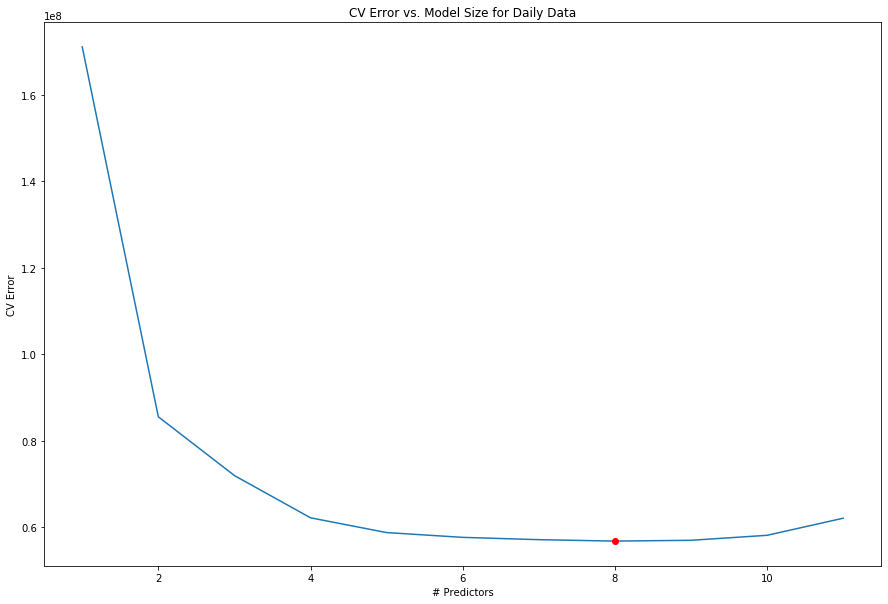

In [0]:
# Finding the best size of the model for daily data
print("For Daily Data:")
cv_mean_day = execute_CV(day_y, day_x,10)
plt.figure(figsize=(15,10))
plt.plot(cv_mean_day)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.title("CV Error vs. Model Size for Daily Data")
plt.plot(cv_mean_day.idxmin(), cv_mean_day.min(), "or")

We see that cross-validation selects an 8-predictor model. We will now use the full data set in order to obtain the actual 8-predictor model.

In [0]:
# Best 8 features for day-wise data
predictors = []
for i in range(1,9):
  best_day = forward(predictors, day_x, day_y["cnt"], day_x, day_y["cnt"]) #we pass the full dataset
  predictors = best_day[0].model.exog_names
print(best_day[0].summary())
print("Best 8 features:", best_day[0].model.exog_names)
#print("R-squared:", best_8_day[0].rsquared)
print("Residuals:\n", best_day[0].resid)
#print("Model Error:", best_day[1]/(len(day_y["cnt"])-9))

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2655.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:23:29   Log-Likelihood:                         -6001.2
No. Observations:                 731   AIC:                                  1.202e+04
Df Residuals:                     723   BIC:                                  1.206e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

CV_Errors Matrix for Hourly Data:
FOLD: 1
R2 of model with feature size  1  is:  0.6013923382668198
R2 of model with feature size  2  is:  0.6463881353890684
R2 of model with feature size  3  is:  0.675365300362683
R2 of model with feature size  4  is:  0.7007302825024457
R2 of model with feature size  5  is:  0.7073495041160069
R2 of model with feature size  6  is:  0.7077139962535358
R2 of model with feature size  7  is:  0.7080325162745083
R2 of model with feature size  8  is:  0.7080512610904076
R2 of model with feature size  9  is:  0.708263473184737
R2 of model with feature size  10  is:  0.7082640199002801
R2 of model with feature size  11  is:  0.7082877847114344
R2 of model with feature size  12  is:  0.7084258477343601
-------------------------------------------------------------------------------
FOLD: 2
R2 of model with feature size  1  is:  0.6001786521367061
R2 of model with feature size  2  is:  0.6462685330679089
R2 of model with feature size  3  is:  0.6759422659105547

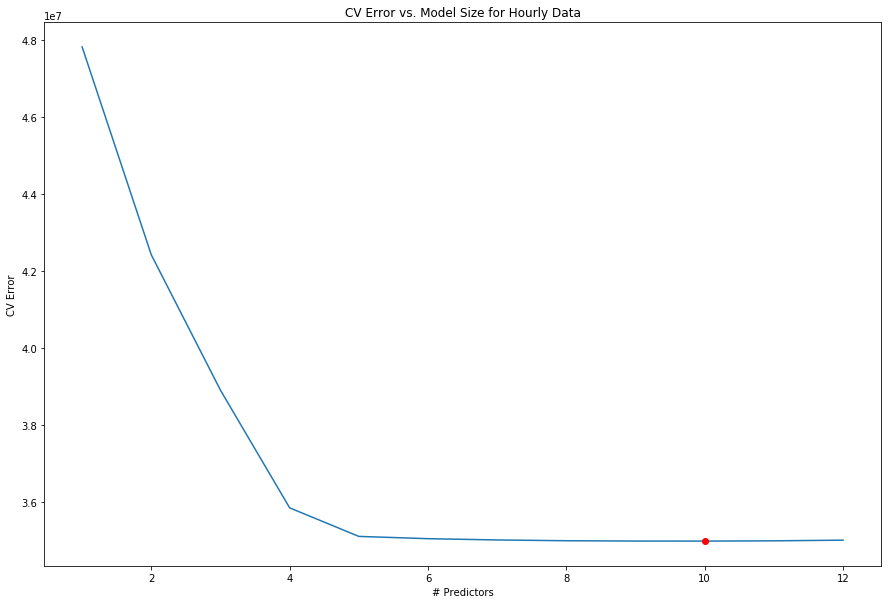

In [0]:
# Finding the best size of the model for hourly data
print("CV_Errors Matrix for Hourly Data:")
cv_mean_hour = execute_CV(hour_y, hour_x,10)
plt.figure(figsize=(15,10))
plt.title("CV Error vs. Model Size for Hourly Data")
plt.plot(cv_mean_hour)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean_hour.idxmin(), cv_mean_hour.min(), "or")

In [0]:
# Best 10 features for hourly data
predictors = []
for i in range(1,11):
  best_hour = forward(predictors, day_x, day_y["cnt"], day_x, day_y["cnt"])
  predictors = best_hour[0].model.exog_names
print(best_hour[0].summary())
print("Best 10 features:", best_hour[0].model.exog_names)
print("Model Error:", best_hour[1]/(len(hour_y["cnt"]-11)))

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2128.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:23:40   Log-Likelihood:                         -5999.5
No. Observations:                 731   AIC:                                  1.202e+04
Df Residuals:                     721   BIC:                                  1.206e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# TWO PROMINENT FEATURES

##### We will use "best subset selection" technique since the number of features to be selected is only two. Also, the whole dataset will be used since we already know the model size.

In [0]:
def twoSubset(features,y,X):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(features)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(features)]) - y) ** 2).sum()
   
    return {"model":regr, "RSS":RSS}


In [0]:
def bestSubset(y,X):
  results = []
    
  for combo in itertools.combinations(X.columns, 2):
    
    results.append(twoSubset(combo,y,X))

  models = pd.DataFrame(results)

  best_model = models.loc[models['RSS'].idxmin()]
  return best_model

In [0]:
two_day = bestSubset(df_day["cnt"],day_x)
two_hour = bestSubset(df_hour["cnt"],hour_x)

In [0]:
print("Best two-sized subset for day-wise data:\n", two_day[0].summary())
f_day = two_day[0].model.exog_names
print("\nTwo dominant features for day-wise data:\n", f_day )

Best two-sized subset for day-wise data:
                                  OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              7125.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:23:41   Log-Likelihood:                         -6144.2
No. Observations:                 731   AIC:                                  1.229e+04
Df Residuals:                     729   BIC:                                  1.230e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]

In [0]:
print("Best two-sized subset for hourly data:\n", two_hour[0].summary())
f_hour = two_hour[0].model.exog_names
print("\nTwo dominant features for hourly data:\n", f_hour)

Best two-sized subset for hourly data:
                                  OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          1.582e+04
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:23:41   Log-Likelihood:                     -1.1244e+05
No. Observations:               17379   AIC:                                  2.249e+05
Df Residuals:                   17377   BIC:                                  2.249e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

Scatter Plots of Dominant Features with Y_actual for Daily Data


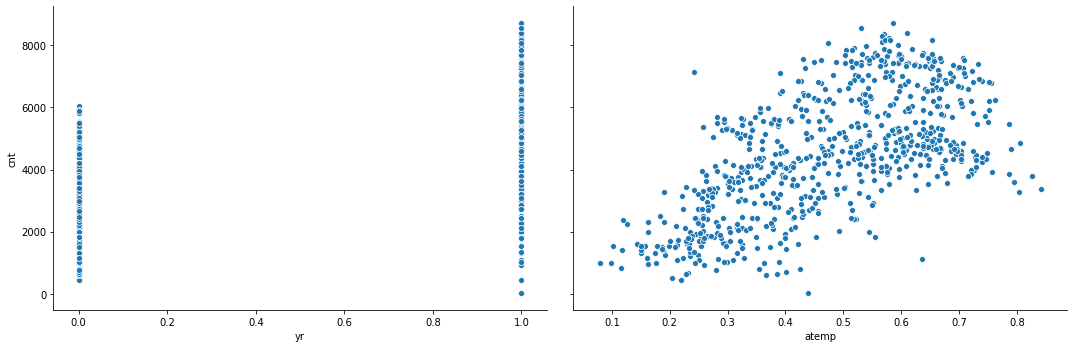

In [0]:
print("Scatter Plots of Dominant Features with Y_actual for Daily Data")
sns.pairplot(df_day, x_vars=f_day, y_vars=["cnt"],height=5, aspect=1.5, kind="scatter")
#sns.lmplot(x=f_day[1], y="cnt", data=df_day,height=5, aspect=1.5, scatter = True)

Scatter Plots of Dominant Features with Y_actual for Hourly Data


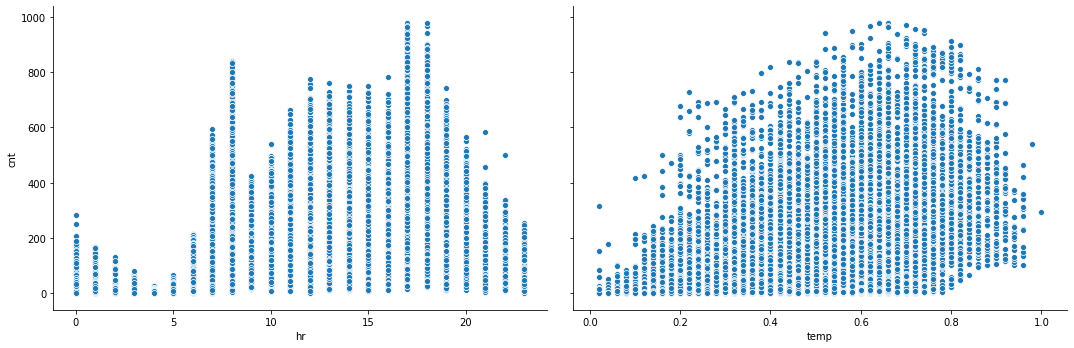

In [0]:
print("Scatter Plots of Dominant Features with Y_actual for Hourly Data")
sns.pairplot(df_hour, x_vars=f_hour, y_vars=["cnt"],height=5, aspect=1.5, kind="scatter")
#sns.lmplot(x=f_hour[0], y="cnt", data=df_hour,height=5, aspect=1.5, scatter = True, x_bins=15)

Scatter Plots of Dominant Features with Y_predicted for Daily Data


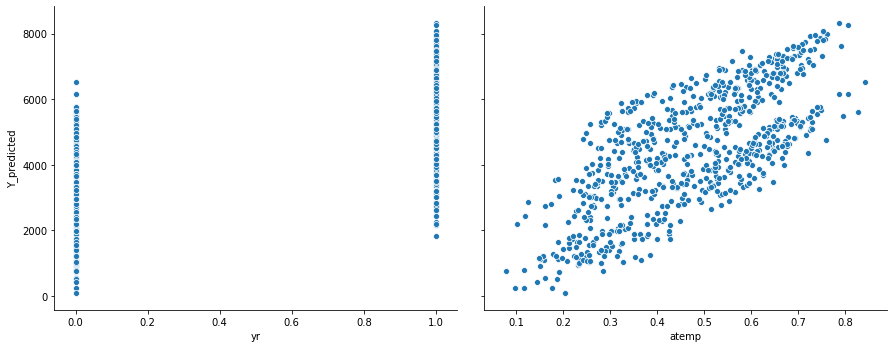

In [0]:
print("Scatter Plots of Dominant Features with Y_predicted for Daily Data")
data0 = pd.concat([best_day[0].fittedvalues, df_day[f_day]],axis=1)
data0.columns = ["Y_predicted", f_day[0],f_day[1]]
sns.pairplot(data0, x_vars=f_day, y_vars=["Y_predicted"],height=5, aspect=1.25, kind="scatter", )

Scatter Plots of Dominant Features with Y_predicted for Hourly Data


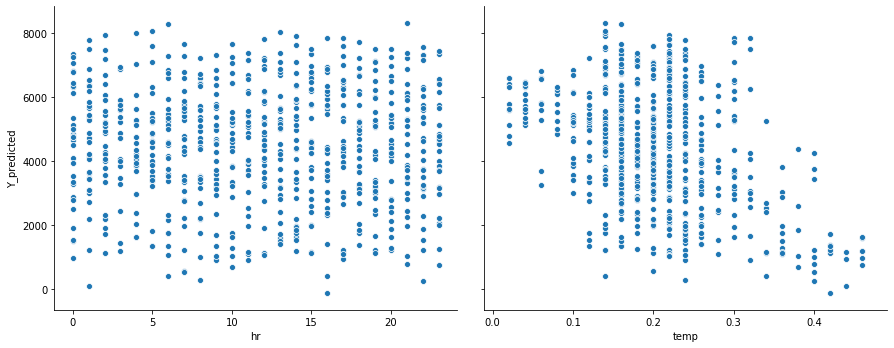

In [0]:
print("Scatter Plots of Dominant Features with Y_predicted for Hourly Data")
data00 = pd.concat([best_hour[0].fittedvalues, df_hour[f_hour]],axis=1)
data00.columns = ["Y_predicted", f_hour[0],f_hour[1]]
sns.pairplot(data00, x_vars=f_hour, y_vars=["Y_predicted"],height=5, aspect=1.25, kind="scatter")

Residual Plots for Daily Data


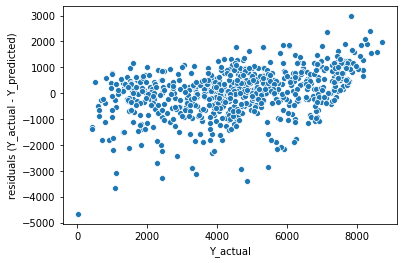

In [0]:
print("Residual Plots for Daily Data")
data1 = pd.concat([best_day[0].resid, best_day[0].fittedvalues, day_y],axis=1)
data1.columns = ["residuals (Y_actual - Y_predicted)", "Y_predicted", "Y_actual"]
sns.scatterplot(x="Y_actual", y="residuals (Y_actual - Y_predicted)", data=data1)
#sns.lmplot(x="Y_actual", y="residuals (Y_actual - Y_predicted)", data=data1, height = 7, aspect =2)
# The plot shows that the data is heteroskedastic

Residual Plots for Hourly Data


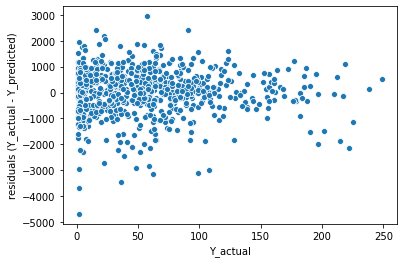

In [0]:
print("Residual Plots for Hourly Data")
data2 = pd.concat([best_hour[0].resid, best_hour[0].fittedvalues, hour_y],axis=1)
data2.columns = ["residuals (Y_actual - Y_predicted)", "Y_predicted", "Y_actual"]

sns.scatterplot(x="Y_actual", y="residuals (Y_actual - Y_predicted)", data=data2)
#sns.lmplot(x="Y_actual", y="residuals (Y_actual - Y_predicted)", data=data2, height = 7, aspect =2, scatter=True, truncate = True, )
# The plot shows that the data is heteroskedastic